# CAO Points Analysis 

<br>

In this Jupyter notebook I will include the following as per the assignment brief:

> clear and concise overview of how to load CAO points info from the CAO website into a pandas data frame - pitched at classmates 10%

> detailed comparision of cao points 2019,2020, and 2021 using the functionality in pandas 20%

> appropriate plots and other visualisations to enhance your notebook 10%


<br>

Please note that additional workings can also be found in the following weekly lecture repository [here](https://github.com/VCurry20/Jupyter-FDA2021)


*****

This file is broken into the following components:

> Imported Modules

> CAO 2021

> CAO 2020

> CAO 2019

> Plots

> References

*****


## Importing Modules

****

In [1]:
# The following are the list of modules we will use in this notebook


import requests as rq                  # used to request data from HTTP site [1] 
import datetime as dt                  # used to set date and time to save file [2] 
import re                              # this is for compiliing regular expressions [3] [4]
import pandas as pd                    # used for Data Frame compilation [5]
import numpy as np                     # Mathimatical Python [6]
import matplotlib.pyplot as plt        # used to plot data from COA points files [7]
import seaborn as sn                   # built on Matplotlib for additional plotting [8]


<br>

## COA 2021 

****

- This data is in HTML format - http://www2.cao.ie/points/l8.php

- In order to work with this data we will need to take a copy from HTML format

- We will save an original copy of the data

- We will then extract from this HTML page the data we require

- We will then save a copy

- From this copy we will then make a data frame using Pandas and Analyise the Data

(Note: The data format has now been changed on the CAO Site - it is now available in spreadsheet format - Excel)

***

<br>

### Getting the Data

***

In [2]:
# get the CAO data from the site using the requests module

resp = rq.get('http://www2.cao.ie/points/l8.php')  # resp is the variable for the data from this site



# We can now review the data:

# 200 means this data has been found at this location and this data has been returned to you
# 404 would mean it is not found [1]

resp  

<Response [200]>

In [3]:
resp.encoding  # this is infact incorrect

'iso-8859-1'

Note:

This encoding is infact incorrect - although iso-8859-1 is an example of extended Ascii and includes letters with Fadas etc it does not cover all of the text figures included in the data.

There is emdashes included in the HTTP site and for this reason we need an encoding that includes these figures.

For this reason we need to encode to cp1252, which covers endash and emdashs. 

We found this error when printing out the data from the site, there was a box with a ? inside

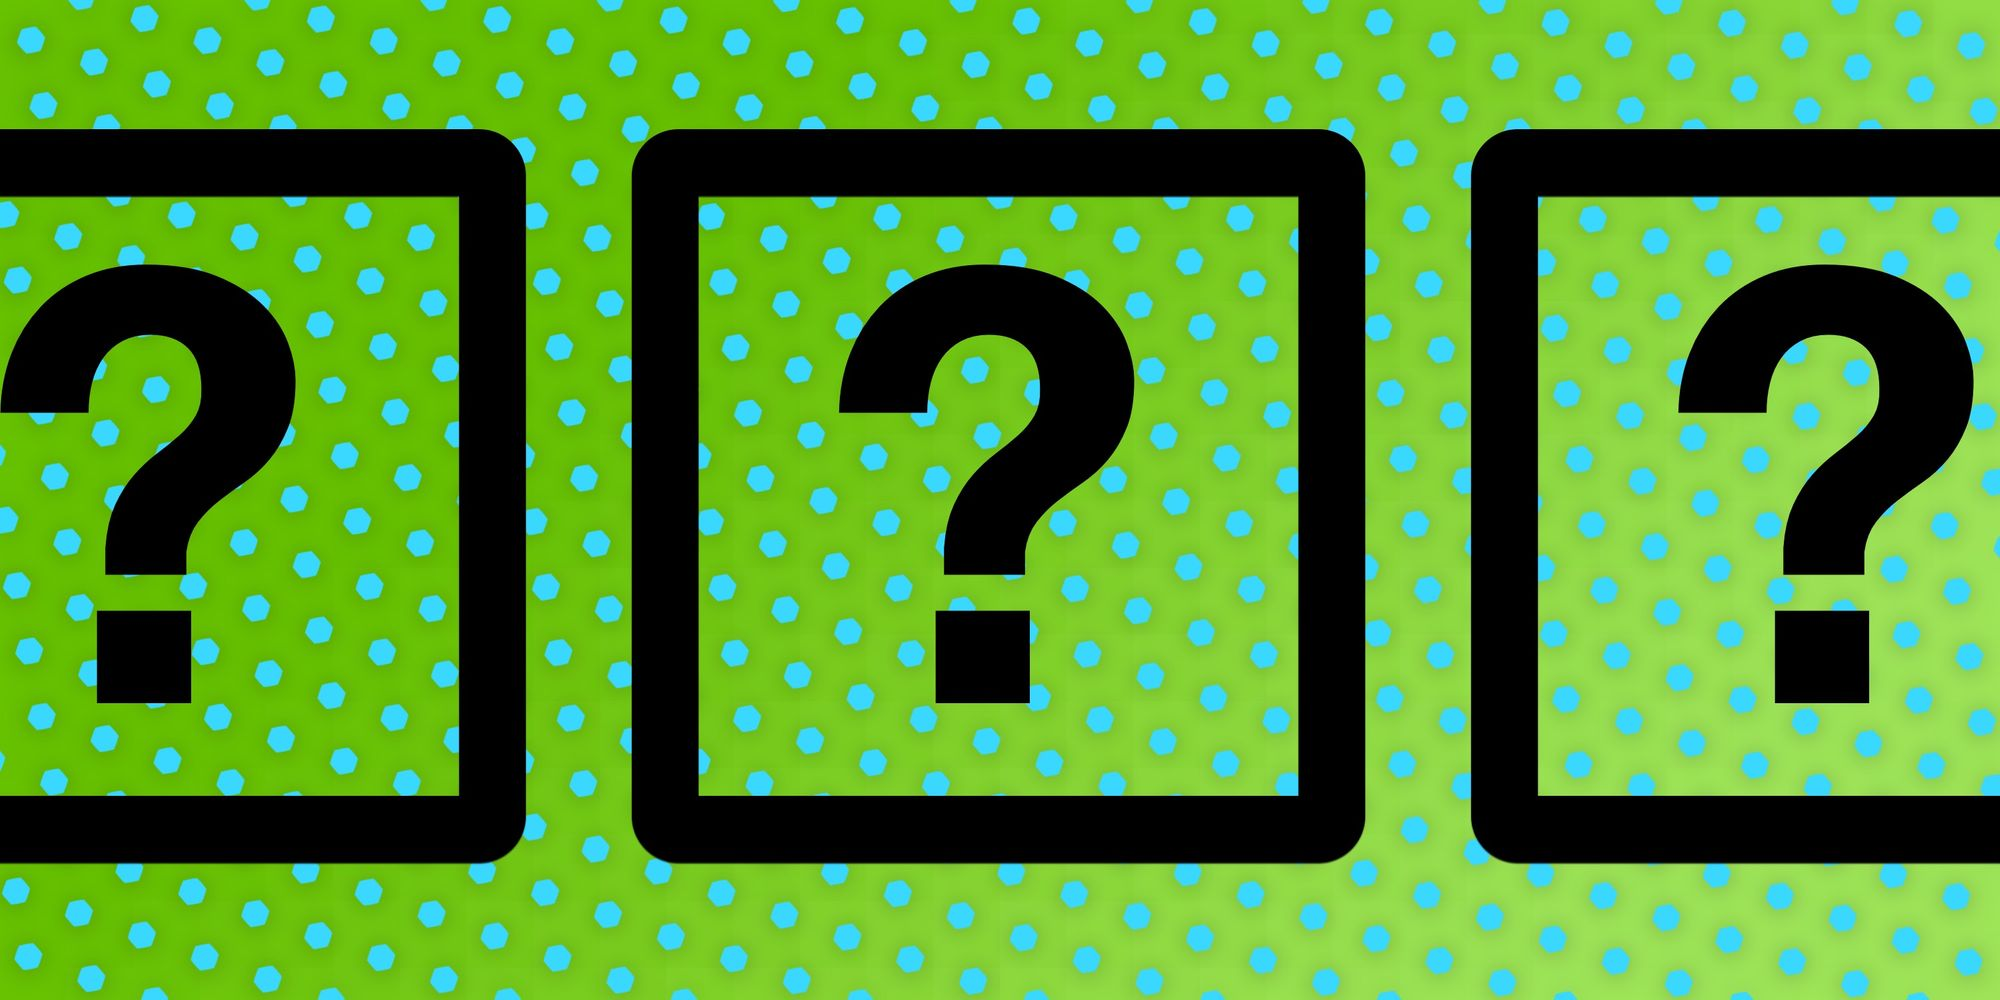

<br>

### Save Copy of Original Data

***

In [12]:
now = dt.datetime.now()                  # set variable now as they date and time it is now

nowstr = now.strftime('%y%m%d_%H%M%S')   # nowstr = is a reordered version of this output

resp.encoding = 'cp1252'                 # encode to cp1252 not iso-8859-1

path = 'Data/cao2021_' + now.strftime('%y%m%d_%H%M%S') + '.html'  # save a HTML file with this name to the data file

with open (path, 'w') as f:   # open a "writable" version
    f.write(resp.text)        

### Extract the Required Lines

***

In [5]:
# here we are using regular expressions to extract from the file the lines of data we need

#re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([^"])(\*?) *')  

# re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([0-9]{3})(\*?) *')  # Ian's version


In [6]:
path = 'Data/cao2021test_csv_' + nowstr + '.csv'

no_lines = 0

with open(path, 'w') as f:
    for line in resp.iter_lines():
        dline = line.decode('cp1252')

        if re_course.fullmatch(dline):
            no_lines = no_lines + 1             
            linesplit = re.split('  +', dline)
            f.write(",".join(linesplit) + '\n')
            
        
print(f"Total number of lines is {no_lines}.") 

NameError: name 're_course' is not defined


# notes to Do  / Fix

For the above - lines starting with B are the orignal website data. This output is because of the print(line) command. This can be #'d so it doesnt show. When we do show it however it give us the chance to compare what we have inputted against what we have outputted.



In the regular expression code we have broken up the parts by using () brackets - if you count this you will see there are 4 sets. These 4 sets correspond to the r'\1,\2,\3,\4 - this allows up to format the csv in the way we want.


For places where there is two sets of points we are pulling in the data in the incorrect line

remove * and # from file


write file using line splitting to make file